# Ranking Data

In [22]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as mp

In [2]:
df = pd.read_csv("browser_rankings_data.csv")
df.reset_index(drop=False, inplace=True)
new_header = df.iloc[0]
df = df[1:] 
df.columns = new_header

In [6]:
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
1,1,browser,2,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
2,2,browser,3,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
3,3,browser,4,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
4,3,browser,4,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
5,4,browser,1,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


In [9]:
df["Rank"] = pd.to_numeric(df["Rank"])

In [31]:
df.dropna(inplace=True)

## 1) Is there any co-relation between short description, long description and ranking? Does the placement of keyword (for example - using a keyword in the first 10 words - have any co-relation with the ranking)?

### To look for co-relation between short description, long description and ranking we need to start by label encoding short description and long description

In [12]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
label1 = le.fit_transform(df["Short Description"])
label2 = le.fit_transform(df["Long Description"])

In [19]:
df["SD_Le"] = label1 #Label Encoded column for Short Description
df["LD_Le"] = label2 #Label Encoded column for Long Description

In [20]:
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description,SD_Le,LD_Le
1,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...",8,2
2,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...",3,1
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",2,0
4,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",2,3
5,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,6,9


### Now lets look for co-relation between short description, long description and ranking 

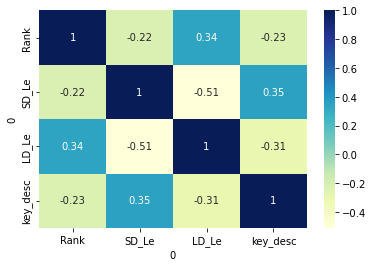

In [32]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
mp.show()

#### From the heatmap the following can be concurred
#### The co-relation coefficient of Rank and Short Description is -0.22 i.e., they have slightly moderate negative coefficiant
#### The co-relation coefficient of Rank and Long Description is 0.34 i.e., they have moderately positive coefficiant


#### As co-relation coefficient shows us the degree of relatedness, we can conclude that long description have a moderate influence on the ranking and short description may have the tendency of having a slightly negative impact.

### Now lets analyse whether the keyword placement inside the description have any impact on the ranking

#### We start by adding a new column to the dataframe, and for each row inside the column:
#### if the keyword is there in the short description OR if the keyword is there in the first 10 words of the long description
#### that row will be updated with a value of 1
#### else it will be updated with 0

In [24]:
l = []

for i in range(0, df.shape[0]):
    if str(df.iloc[i][1]) in (str(df.iloc[i][8]).lower() or str(df.iloc[i][9][:60]).lower()):
        l.append(1)
    else:
        l.append(0)

In [25]:
df["key_desc"] = l

In [26]:
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description,SD_Le,LD_Le,key_desc
1,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...",8,2,1
2,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...",3,1,1
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",2,0,1
4,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",2,3,1
5,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,6,9,1


In [33]:
st.pearsonr(df["Rank"], df["key_desc"])

(-0.2321807551274775, 1.300560789496824e-38)

#### As the co-relation coefficient between them is -0.23, we can conclude that keyword placement has a very slight chance of negatively impacting the rankings.

##  

## 2) Does APP ID (Also known as package name) play any role in ranking? 

### Let us start by implementing one way ANOVA

In [34]:
import pingouin as pg

In [35]:
aov = pg.anova(dv='Rank', between='App ID', data=df, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,App ID,1.222881e+06,7,174697.248735,927.702425,0.0,0.680996
1,Within,5.728443e+05,3042,188.311730,NaN,NaN,NaN


#### As we can see, the F value is extremely high, this suggests high variation withing the sample 

### Lets analyse the cross table to gain more insights

In [36]:
myCrosstable = pd.crosstab(df['App ID'], df['Rank'])
myCrosstable

Rank,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,111.0,112.0,113.0,114.0,115.0,116.0,117.0,118.0,119.0,134.0
App ID,,,,,,,,,,,,,,,,,,,,,
com.android.chrome,18,6,7,6,1,5,4,11,1,8,...,0,0,0,0,0,0,0,0,0,0
com.brave.browser,5,201,57,39,20,23,9,10,2,2,...,0,0,0,0,0,0,0,0,0,0
com.cloudmosa.puffinTV,72,212,80,76,32,36,40,8,16,12,...,0,0,0,0,0,0,0,0,0,0
com.duckduckgo.mobile.android,428,12,0,0,12,104,24,10,2,0,...,0,0,0,0,0,0,0,0,0,0
com.opera.browser,8,38,62,44,50,34,26,16,12,10,...,0,0,0,0,0,0,0,0,0,0
com.transsion.phoenix,0,0,0,0,0,6,11,15,15,20,...,1,0,1,0,0,0,1,0,1,0
com.vivaldi.browser,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,2,2,1,2,0,1
net.fast.web.browser,31,21,8,5,10,5,8,12,8,8,...,0,0,0,0,0,0,0,0,0,0


#### Here we can see how duckduckgo has the highest first ranking, and how brave browser has a very high number of 2nd ranking compared to its first which is significantly less
#### From this we can conclude how App_ID has a significant role to play when it comes to ranking

### Let us find the correlation coefficient to confirm its significance 

In [37]:
label = le.fit_transform(df["App ID"])

In [38]:
df["App_ID_Label"] = label

In [39]:
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description,SD_Le,LD_Le,key_desc,App_ID_Label
1,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...",8,2,1,7
2,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...",3,1,1,0
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",2,0,1,4
4,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",2,3,1,4
5,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,6,9,1,2


In [40]:
np.corrcoef(df["Rank"], df["App_ID_Label"])

array([[1.        , 0.52869287],
       [0.52869287, 1.        ]])

#### As the coefficient is 0.52, we can confirm and conclude that App_ID plays a significant role in browser ranking

## 

## 3) Does recent changes in the description affect the rankings

### Let us start by extracting months from the description change data

In [44]:
df['month_change'] = pd.DatetimeIndex(df['Date of Last Description Change']).month

In [48]:
df.head()

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description,SD_Le,LD_Le,key_desc,App_ID_Label,month_change
1,1,browser,2.0,in,en,2020-12-16,net.fast.web.browser,2020-12-18,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows...",8,2,1,7,12
2,2,browser,3.0,in,en,2020-12-16,com.android.chrome,2020-12-18,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu...",3,1,1,0,12
3,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2021-02-27,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest...",2,0,1,4,2
4,3,browser,4.0,in,en,2020-12-16,com.opera.browser,2020-12-18,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And...",2,3,1,4,12
5,4,browser,1.0,in,en,2020-12-16,com.cloudmosa.puffinTV,2021-02-07,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...,6,9,1,2,2


In [49]:
df.corr()

,Rank,SD_Le,LD_Le,key_desc,App_ID_Label,month_change
0,,,,,,
Rank,1.000000,-0.222662,0.33943,-0.232181,0.528693,0.278681
SD_Le,-0.222662,1.000000,-0.51138,0.352676,-0.066681,-0.018080
LD_Le,0.339430,-0.511380,1.00000,-0.309560,0.114900,-0.161710
key_desc,-0.232181,0.352676,-0.30956,1.000000,-0.113387,-0.196530
App_ID_Label,0.528693,-0.066681,0.11490,-0.113387,1.000000,0.228326
month_change,0.278681,-0.018080,-0.16171,-0.196530,0.228326,1.000000


#### As the coefficient between rank and the month_change is 0.27, we can conclude that browsers with recent description change may have a slight edge over other browsers when it comes to ranking them

## 

# Thank you!!